In [1]:
import numpy as np
import matplotlib.pyplot as plt
import triangle as tr
import matplotlib.lines as mlines

C:\Users\z0047hfn\AppData\Local\Temp\ipykernel_25948\2301726361.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  gnbu_colormap = plt.cm.get_cmap("GnBu")


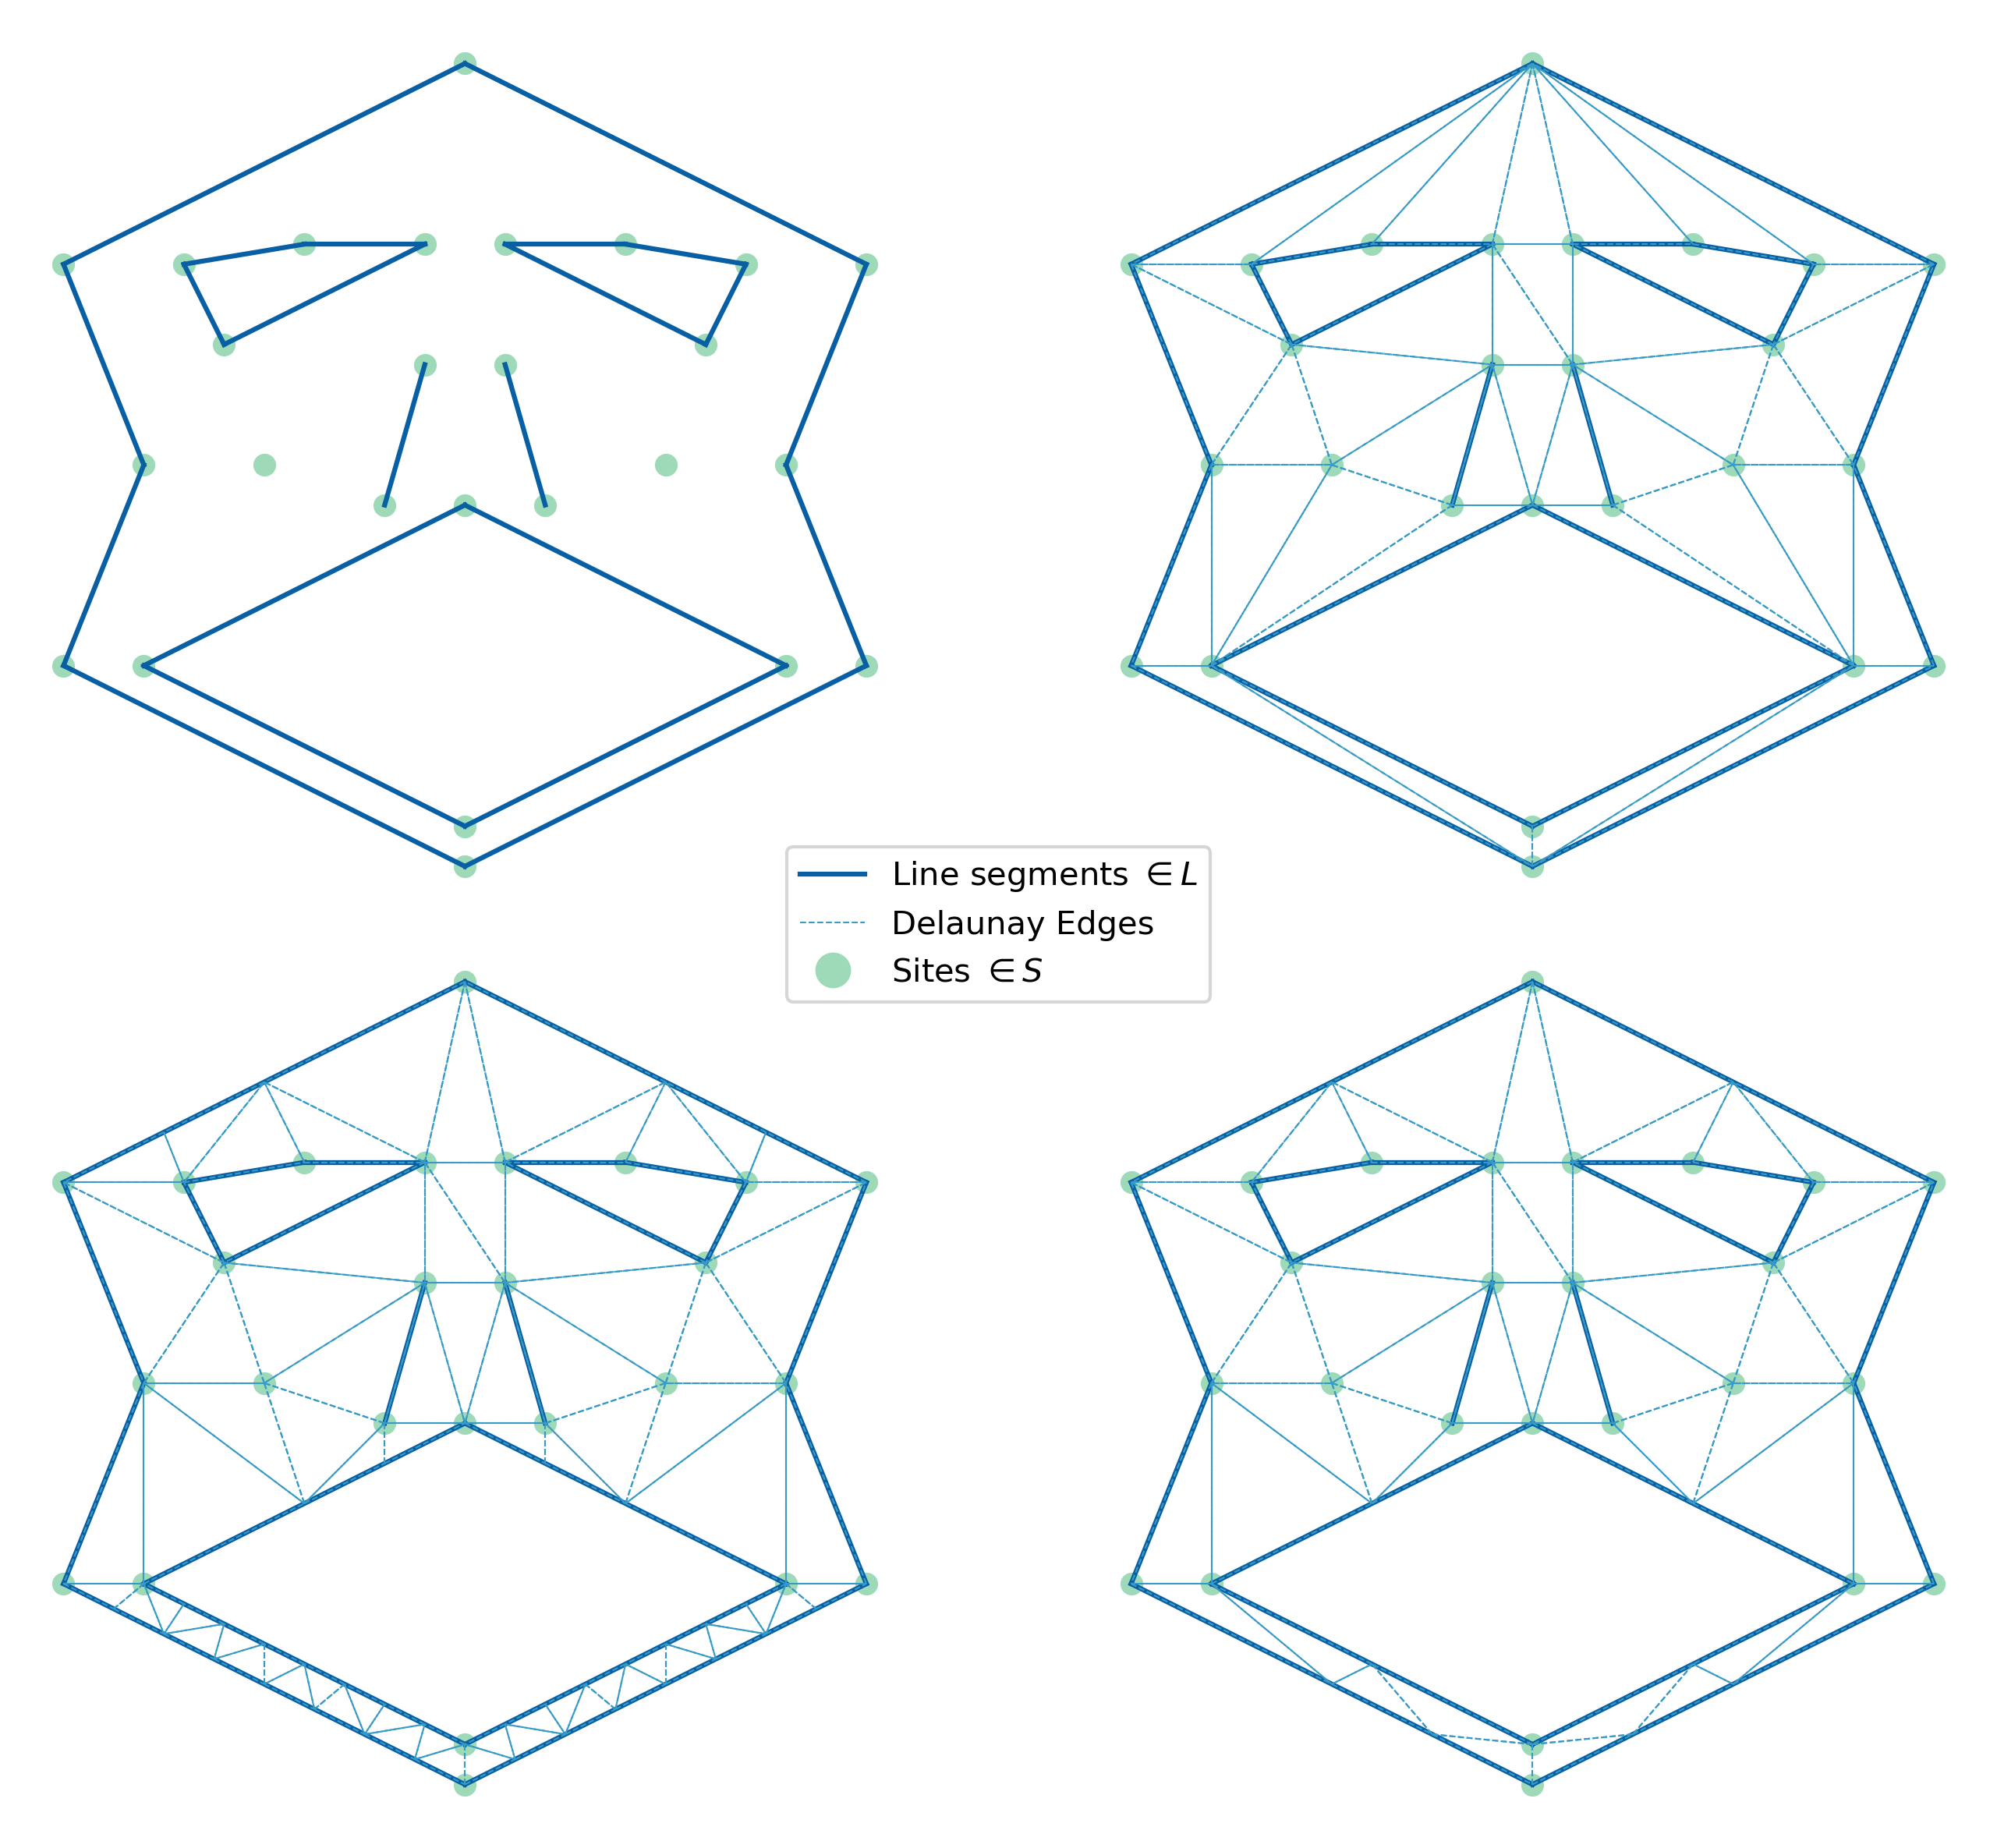

In [2]:
# Assuming 'face' and your triangulation functions are defined as before
face = tr.get_data("face")
constrained_delaunay_triangulation = tr.triangulate(face, "p")
conforming_delaunay_triangulation = tr.triangulate(face, "pq0D")
conforming_constrained_delaunay_triangulation = tr.triangulate(face, "pq10")

# Define colors from the GnBu colormap
gnbu_colormap = plt.cm.get_cmap("GnBu")
line_seg_color = gnbu_colormap(0.9)
delaunay_edge_color = gnbu_colormap(0.7)
point_color = gnbu_colormap(0.4)

# Start subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2, figsize=(10, 8), dpi=300)  # 2 rows, 2 columns


# Define a function to plot segments to reduce redundancy
def plot_segments(ax, face, line_color, line_style, line_width):
    for segment in face["segments"]:
        ax.plot(
            face["vertices"][segment, 0],
            face["vertices"][segment, 1],
            color=line_color,
            linestyle=line_style,
            linewidth=line_width,
        )


# Define a function to plot triangulation to reduce redundancy
def plot_triangulation(ax, triangulation, line_color, line_style, line_width):
    for triangle in triangulation["triangles"]:
        for i in range(3):
            start_point = triangulation["vertices"][triangle[i]]
            end_point = triangulation["vertices"][triangle[(i + 1) % 3]]
            ax.plot(
                [start_point[0], end_point[0]],
                [start_point[1], end_point[1]],
                color=line_color,
                linestyle=line_style,
                linewidth=line_width,
            )


# Plotting for the first row (existing code)
ax[0, 0].set_aspect("equal")
ax[0, 0].axis("off")
plot_segments(ax[0, 0], face, line_seg_color, "-", 1.5)
ax[0, 0].scatter(
    face["vertices"][:, 0], face["vertices"][:, 1], color=point_color
)
# ax[0, 0].set_title("Input")

ax[0, 1].set_aspect("equal")
ax[0, 1].axis("off")
plot_segments(ax[0, 1], face, line_seg_color, "-", 1.5)
plot_triangulation(
    ax[0, 1], constrained_delaunay_triangulation, delaunay_edge_color, "--", 0.5
)
ax[0, 1].scatter(
    face["vertices"][:, 0], face["vertices"][:, 1], color=point_color
)
# ax[0, 1].set_title("Constrained Delaunay Triangulation")

# Plotting for the second row (new triangulations)
ax[1, 0].set_aspect("equal")
ax[1, 0].axis("off")
plot_segments(ax[1, 0], face, line_seg_color, "-", 1.5)
plot_triangulation(
    ax[1, 0], conforming_delaunay_triangulation, delaunay_edge_color, "--", 0.5
)
ax[1, 0].scatter(
    face["vertices"][:, 0], face["vertices"][:, 1], color=point_color
)
# ax[1, 0].set_title("Conforming Delaunay Triangulation")

ax[1, 1].set_aspect("equal")
ax[1, 1].axis("off")
plot_segments(ax[1, 1], face, line_seg_color, "-", 1.5)
plot_triangulation(
    ax[1, 1],
    conforming_constrained_delaunay_triangulation,
    delaunay_edge_color,
    "--",
    0.5,
)
ax[1, 1].scatter(
    face["vertices"][:, 0], face["vertices"][:, 1], color=point_color
)
# ax[1, 1].set_title("Conforming Constrained Delaunay Triangulation")

# Create custom legend
line_seg_legend = mlines.Line2D(
    [],
    [],
    color=line_seg_color,
    linestyle="-",
    linewidth=1.5,
    label="Line segments $\\in L$",
)
delaunay_edge_legend = mlines.Line2D(
    [],
    [],
    color=delaunay_edge_color,
    linestyle="--",
    linewidth=0.5,
    label="Delaunay Edges",
)
points_legend = mlines.Line2D(
    [],
    [],
    color=point_color,
    marker="o",
    linestyle="None",
    markersize=10,
    label="Sites $\\in S$",
)

# Add the legend to the last plot
fig.legend(
    handles=[line_seg_legend, delaunay_edge_legend, points_legend],
    loc="center",
    ncol=1,  # Arrange legend entries in 3 columns
    bbox_to_anchor=(0.5, 0.5),  # Position at the center of the figure
)

plt.tight_layout()
plt.show()